In [51]:
import tensorflow as tf


In [52]:
# AI Assignment 2
# Build an ANN model for Drug classification
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mp

In [53]:
data = pd.read_csv('drug200.csv') 

In [54]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [55]:
data.shape

(200, 6)

In [56]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [57]:
data.describe

<bound method NDFrame.describe of      Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  DrugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  DrugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]>

<Axes: >

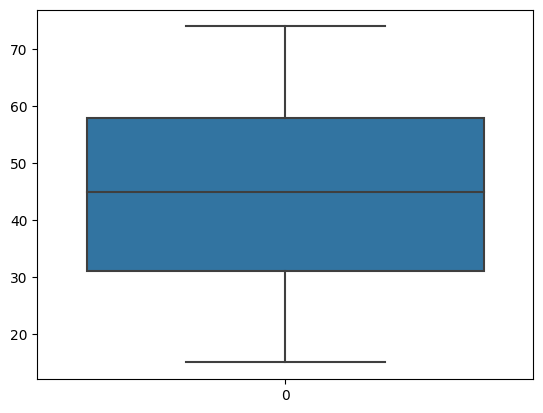

In [58]:
sns.boxplot(data['Age'])

<Axes: >

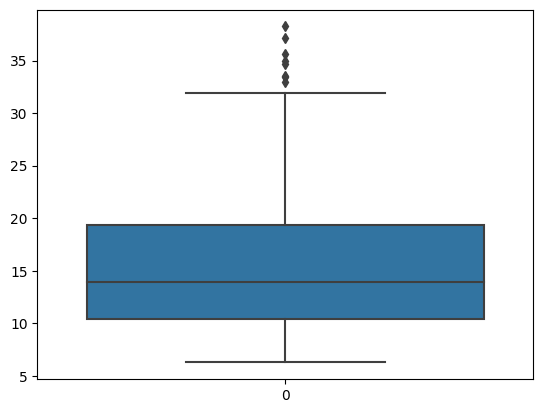

In [59]:
sns.boxplot(data['Na_to_K'])

In [60]:
X = data.iloc[:, :-1] # iloc[:,:]
X.head(2)

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093


In [61]:
y = data.iloc[:, -1]

In [63]:
from tensorflow.keras.utils import to_categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y, num_classes=5)

In [64]:
label_encoder = LabelEncoder()
X['Sex'] = label_encoder.fit_transform(X['Sex'])

In [65]:
X_encoded = pd.get_dummies(X, columns=['BP', 'Cholesterol'])

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [67]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()

In [69]:
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=8, activation='relu'))


In [70]:
model.add(Dense(units=5, activation='softmax'))

In [71]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [73]:
model.fit(X_train,y_train,batch_size=4,epochs=10)

Epoch 1/10
40/40 [==============================] - 0s 4ms/step - loss: 1.2300 - accuracy: 0.6500
Epoch 2/10
40/40 [==============================] - 0s 4ms/step - loss: 0.8419 - accuracy: 0.7312
Epoch 3/10
40/40 [==============================] - 0s 4ms/step - loss: 0.5701 - accuracy: 0.8500
Epoch 4/10
40/40 [==============================] - 0s 4ms/step - loss: 0.3935 - accuracy: 0.8938
Epoch 5/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2764 - accuracy: 0.9062
Epoch 6/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2208 - accuracy: 0.9062
Epoch 7/10
40/40 [==============================] - 0s 3ms/step - loss: 0.1716 - accuracy: 0.9438
Epoch 8/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1597 - accuracy: 0.9375
Epoch 9/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1144 - accuracy: 0.9750
Epoch 10/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1111 - accuracy: 0.9563


In [74]:
model.fit(X_train, y_train, batch_size=4, epochs=10)

Epoch 1/10
40/40 [==============================] - 0s 2ms/step - loss: 0.1203 - accuracy: 0.9688
Epoch 2/10
40/40 [==============================] - 0s 2ms/step - loss: 0.0816 - accuracy: 0.9750
Epoch 3/10
40/40 [==============================] - 0s 2ms/step - loss: 0.0692 - accuracy: 0.9937
Epoch 4/10
40/40 [==============================] - 0s 3ms/step - loss: 0.0560 - accuracy: 0.9812
Epoch 5/10
40/40 [==============================] - 0s 2ms/step - loss: 0.0409 - accuracy: 1.0000
Epoch 6/10
40/40 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 1.0000
Epoch 7/10
40/40 [==============================] - 0s 2ms/step - loss: 0.0323 - accuracy: 1.0000
Epoch 8/10
40/40 [==============================] - 0s 2ms/step - loss: 0.0280 - accuracy: 1.0000
Epoch 9/10
40/40 [==============================] - 0s 2ms/step - loss: 0.0264 - accuracy: 0.9937
Epoch 10/10
40/40 [==============================] - 0s 2ms/step - loss: 0.0251 - accuracy: 0.9937


In [76]:
ypred = model.predict(X_test)

2/2 [==============================] - 0s 7ms/step


In [78]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

2/2 [==============================] - 0s 10ms/step - loss: 0.0888 - accuracy: 0.9750
Test Loss: 0.0888
Test Accuracy: 0.9750


In [103]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Sample input data
sample_data = np.array([[45, 'F', 'HIGH', 'HIGH', 0.9]])

# Preprocess the sample data
sample_data_encoded = np.zeros((sample_data.shape[0], 8))
sample_data_encoded[:, 0] = sample_data[:, 0]  # Age
sample_data_encoded[:, 1] = 1 if sample_data[:, 1] == 'M' else 0  # Sex
sample_data_encoded[:, 2] = 1 if sample_data[:, 2] == 'HIGH' else 0  # BP_HIGH
sample_data_encoded[:, 3] = 1 if sample_data[:, 2] == 'LOW' else 0  # BP_LOW
sample_data_encoded[:, 4] = 1 if sample_data[:, 2] == 'NORMAL' else 0  # BP_NORMAL
sample_data_encoded[:, 5] = 1 if sample_data[:, 3] == 'HIGH' else 0  # Cholesterol_HIGH
sample_data_encoded[:, 6] = 1 if sample_data[:, 3] == 'NORMAL' else 0  # Cholesterol_NORMAL
sample_data_encoded[:, 7] = sample_data[:, 4]  # Na_to_K

# Predict the drug category
predicted_category = np.argmax(model.predict(sample_data_encoded), axis=1)
print("Predicted Drug Category:", predicted_category)


1/1 [==============================] - 0s 31ms/step
Predicted Drug Category: [0]
